In [2]:
import pandas as pd
import numpy as np
import matplotlib

In [3]:
def get_data(size = 10_000):
    df = pd.DataFrame()
    df['age'] = np.random.randint(0, 100, size)
    df['time_in_bed'] = np.random.randint(0, 9, size)
    df['pct_sleeping'] = np.random.rand(size)
    df['favorite_food'] = np.random.choice(['pizza', 'taco', 'ice_cream'], size)
    df['hate_food'] = np.random.choice(['broccoli', 'candycorn', 'eggs'], size)
    return df

In [4]:
get_data().to_csv('get_data.csv', index=False)
df = pd.read_csv('get_data.csv')
df

,age,time_in_bed,pct_sleeping,favorite_food,hate_food
0,31,5,0.830765,ice_cream,broccoli
1,17,2,0.058359,pizza,candycorn
2,31,2,0.906799,ice_cream,eggs
3,39,5,0.977744,ice_cream,broccoli
4,92,7,0.386331,pizza,eggs
...,...,...,...,...,...
9995,46,5,0.496114,taco,candycorn
9996,16,3,0.312910,taco,broccoli
9997,51,6,0.356168,taco,broccoli
9998,80,4,0.076852,taco,broccoli


## The Problem
Reward calculation:
- If they were in bed for more than 5 hours AND they were sleeping for more than 50% we give them their favorite food.
- Otherwise we give them their hate food.
If they are over 90 years old give their favorite food regardless.|

In [5]:
def reward_calc(row):
    if row['age'] >=90:
        return row['favorite_food']
    if (row['time_in_bed'] > 5) & (row['pct_sleeping'] > 0.5):
        return row['favorite_food']
    return row['hate_food']

## Level 1 - Loop 

In [6]:
# %%timeit
df 
for index, row in df.iterrows():
    df.loc[index, 'reward'] = reward_calc(row)

## level 2 - Apply

In [7]:
# %%timeit
df 
df["reward"] = df.apply(reward_calc, axis=1)

## Level 3 - Vectorized

In [8]:
# %%timeit
df 
df['reward'] = df["hate_food"]
df.loc[
    ((df['pct_sleeping'] > 0.5) & (df['time_in_bed'] > 5)) | 
    (df['age'] > 90), 'reward'] = df['favorite_food']

In [9]:
df['reward_outcome'] = ''
df.shape

(10000, 7)

In [10]:
df

,age,time_in_bed,pct_sleeping,favorite_food,hate_food,reward,reward_outcome
0,31,5,0.830765,ice_cream,broccoli,broccoli,
1,17,2,0.058359,pizza,candycorn,candycorn,
2,31,2,0.906799,ice_cream,eggs,eggs,
3,39,5,0.977744,ice_cream,broccoli,broccoli,
4,92,7,0.386331,pizza,eggs,pizza,
...,...,...,...,...,...,...,...
9995,46,5,0.496114,taco,candycorn,candycorn,
9996,16,3,0.312910,taco,broccoli,broccoli,
9997,51,6,0.356168,taco,broccoli,broccoli,
9998,80,4,0.076852,taco,broccoli,broccoli,


In [11]:
df2 = df.copy()
df2.shape

(10000, 7)

In [12]:
df3 = df.copy()
df3.shape

(10000, 7)

In [13]:
# df2 = (df.query('favorite_food != reward')).dropna()
df2 = df2.query('favorite_food == reward')
df2 = df2.assign(reward_outcome = 'fav_food')
# df2

In [14]:
df3 = df3.query('favorite_food != reward')
df3 = df3.assign(reward_outcome = 'hate_food')
# df3

In [15]:
reward = pd.concat([df2, df3], axis=0)
# reward.head(10000)

<AxesSubplot:>

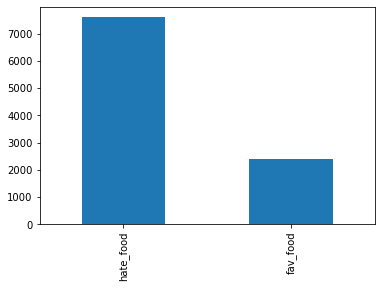

In [16]:
reward['reward_outcome'].value_counts().plot(kind='bar')